# Training Model - Unbalance Data

# Import Library

In [4]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Read Data

In [5]:
#Read data X_train dan y_train hasil dari data preparation
X_train_clean = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\X_train_tfidf.pkl") 
y_train = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\y_train_encoded.pkl")

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\X_valid_tfidf.pkl")
y_valid = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\y_valid_encoded.pkl")

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\X_test_tfidf.pkl")
y_test = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\y_test_encoded.pkl")

## Baseline Model

In [6]:
y_baseline_predict = y_train.mean()
y_baseline_predict

36.69828190743338

## Logistic Regression

In [7]:
# Build Logistic Regression
logreg_awal = LogisticRegression(random_state = 123)

In [8]:
# fit Logistic Regression
logreg_awal.fit(X_train_clean, y_train)

LogisticRegression(random_state=123)

In [9]:
# Melihat Score dari model logreg
logreg_awal.score(X_train_clean, y_train)

0.9228611500701263

In [10]:
#Prediksi Logreg
logreg_pred = logreg_awal.predict(X_test_clean)

In [11]:
#Melihat Classification report
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.86      0.92      0.89        13
           2       0.96      0.96      0.96        25
           3       1.00      0.75      0.86         8
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        10
           6       0.84      0.92      0.88        53
           7       0.93      0.90      0.92        42
           8       1.00      1.00      1.00         8
           9       0.90      0.75      0.82        12
          10       1.00      0.82      0.90        11
          11       0.70      0.76      0.73        41
          12       0.92      0.90      0.91        50
          13       1.00      1.00      1.00        17
          14       0.95      0.89      0.92        47
          15       0.84      0.91      0.88        82
          16       0.75      0.27      0.40        11
          17       0.75    

In [12]:
#Melihat score data train, validation dan test
print("Train_Score = ", logreg_awal.score(X_train_clean, y_train), 
      "Valid_Score = ",logreg_awal.score(X_valid_clean, y_valid),
      "Test_Score = ", logreg_awal.score(X_test_clean, y_test))

Train_Score =  0.9228611500701263 Valid_Score =  0.8448729184925504 Test_Score =  0.8714202220923437


## Tuning Parameter Logistic Regression

In [13]:
logreg = LogisticRegression(random_state = 123)

In [14]:
# Membentuk parameter untuk eksperimentasi
lr_param_grid = {
    'C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty' : ['l1', 'l2', 'elasticnet','none']
}

In [15]:
# Cross Validation menggunakan GridsearchCV
lr_grid = GridSearchCV(LogisticRegression(random_state = 123), lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [16]:
#Fitting Model lr grid
lr_grid.fit(X_train_clean, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.054 total time=   0.2s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.053 total time=   0.2s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.054 total time=   0.2s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.054 total time=   0.2s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.054 total time=   0.2s
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1,

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [14]:
#Melihat parameter terbaik untuk model
print(lr_grid.best_params_)

{'C': 0.01, 'penalty': 'none', 'solver': 'saga'}


In [15]:
#Input parameter terbaik hasil GridsearchCV
lr_grid_cv  = LogisticRegression(C = lr_grid.best_params_["C"],
                                 penalty = lr_grid.best_params_["penalty"],
                                 solver = lr_grid.best_params_["solver"])

#Kembali fitting model
lr_grid_cv.fit(X_train_clean, y_train)

LogisticRegression(C=0.01, penalty='none', solver='saga')

In [16]:
print(f"Training Data Score: {lr_grid_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {lr_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lr_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.9998758072528564
Validating Data Score: 0.8337468982630273
Testing Data Score: 0.8500414250207126


In [17]:
#Prediksi dengan menggunakan data test
logregtun_pred = lr_grid_cv.predict(X_test_clean)

In [18]:
#Melihat Classification report
print(classification_report(y_test, logregtun_pred))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        25
           1       0.92      0.92      0.92       147
           2       0.86      0.93      0.89       594
           3       0.68      0.62      0.65        68
           4       0.83      0.79      0.81       123
           5       0.82      0.75      0.78       250

    accuracy                           0.85      1207
   macro avg       0.82      0.76      0.79      1207
weighted avg       0.85      0.85      0.85      1207



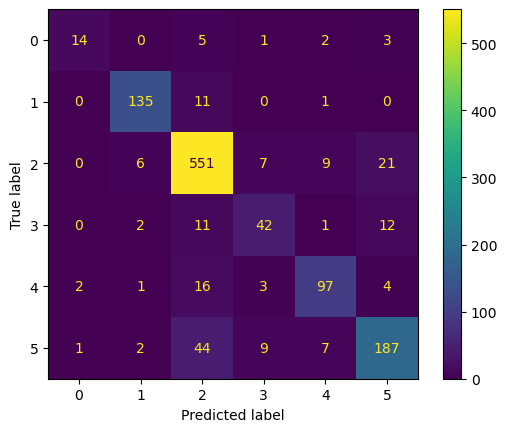

In [19]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, logregtun_pred, display_labels=unique_labels)
plt.show()

## Support Vector Classifier

In [20]:
svc_ori = SVC(random_state = 123)

In [21]:
# fit Support Vector Classifier
svc_ori.fit(X_train_clean, y_train)

SVC(random_state=123)

In [22]:
#Cek Score model SVC
svc_ori.score(X_train_clean, y_train)

0.9868355688027819

In [23]:
svc_predict = svc_ori.predict(X_test_clean)

In [24]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.94      0.80      0.87       147
           2       0.74      0.96      0.84       594
           3       0.95      0.26      0.41        68
           4       0.93      0.64      0.76       123
           5       0.80      0.64      0.71       250

    accuracy                           0.79      1207
   macro avg       0.89      0.56      0.61      1207
weighted avg       0.81      0.79      0.77      1207



In [25]:
print(f"Training Data Score: {svc_ori.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {svc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.9868355688027819
Validating Data Score: 0.7952853598014888
Testing Data Score: 0.7862468931234465


## Tuning Parameter SVC

In [26]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'gamma': ['scale', 'auto']
             }

In [27]:
#Membentuk parameter untuk eksperimentasi
svc_grid = GridSearchCV(SVC(random_state = 123), 
                        param_grid, 
                        verbose=3, 
                        cv= 5, 
                        n_jobs=4, 
                        scoring='accuracy')

In [28]:
#Melakukan fitting model gridsearchcv
svc_grid.fit(X_train_clean, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=4,
             param_grid={'C': [0.0005, 0.001, 0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [29]:
#Melihat parameter terbaik
svc_grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [30]:
#Melakukan input parameter terbaik hasil gridsearch
svc_grid_cv  = SVC(kernel = svc_grid.best_params_["kernel"],
                   gamma = svc_grid.best_params_["gamma"],
                   C = svc_grid.best_params_["C"]
                  )

In [31]:
svc_grid_cv.fit(X_train_clean, y_train)

SVC(C=0.5, kernel='linear')

In [32]:
print(f"Training Data Score: {svc_grid_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {svc_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.8826378539493294
Validating Data Score: 0.8002481389578163
Testing Data Score: 0.7953603976801988


In [33]:
svc_pred_cv = svc_grid_cv.predict(X_test_clean)

In [34]:
print(classification_report(y_test, svc_pred_cv))

              precision    recall  f1-score   support

           0       0.67      0.08      0.14        25
           1       0.93      0.84      0.89       147
           2       0.75      0.96      0.85       594
           3       0.90      0.26      0.41        68
           4       0.93      0.66      0.77       123
           5       0.80      0.65      0.72       250

    accuracy                           0.80      1207
   macro avg       0.83      0.58      0.63      1207
weighted avg       0.81      0.80      0.78      1207



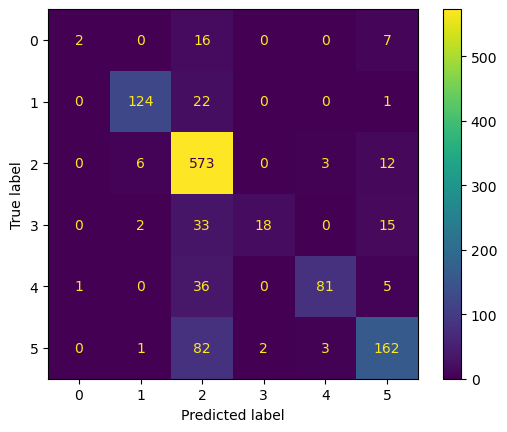

In [35]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred_cv, display_labels=unique_labels)
plt.show()

## Decisiontree

In [3]:
# Model Decision Tree
decTree = DecisionTreeClassifier(random_state = 123)

In [4]:
# Fitting model
decTree.fit(X_train_clean, y_train)

DecisionTreeClassifier(random_state=123)

In [5]:
# Model score
decTree.score(X_train_clean, y_train)

1.0

In [6]:
#Prediksi data menggunakan data test
dectree_predict = decTree.predict(X_test_clean)

In [7]:
#Melihat Classification report
print(classification_report(y_test, dectree_predict))

              precision    recall  f1-score   support

           0       0.37      0.28      0.32        25
           1       0.70      0.72      0.71       147
           2       0.80      0.75      0.78       594
           3       0.40      0.31      0.35        68
           4       0.44      0.65      0.53       123
           5       0.64      0.63      0.64       250

    accuracy                           0.68      1207
   macro avg       0.56      0.56      0.55      1207
weighted avg       0.69      0.68      0.68      1207



In [8]:
#Melihat score prediksi dari data train, valid dan test
print(f"Training Data Score: {decTree.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {decTree.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.6985111662531017
Testing Data Score: 0.6785418392709196


## Tuning Parameter Decisiontree

In [9]:
# Buat parameter untuk eksperimen
decTree_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                "criterion": ["gini", "entropy", "log_loss"],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],}

In [10]:
# Buat plan eksperimentasi
random_decTree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123),
                              param_grid = decTree_param,
                              cv = 5,
                              scoring = "accuracy") 

In [11]:
# Lakukan fitting eksperimentasi
random_decTree.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [12]:
random_decTree.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [13]:
# Buat model
best_decTree = DecisionTreeClassifier(max_depth = random_decTree.best_params_["max_depth"],
                                      criterion = random_decTree.best_params_["criterion"],
                                      min_samples_leaf = random_decTree.best_params_["min_samples_leaf"],
                                      min_samples_split = random_decTree.best_params_["min_samples_split"],
                                      random_state = 123)

In [14]:
# Fit model
best_decTree.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=12, random_state=123)

In [15]:
# Cek Train data
best_decTree.score(X_train_clean, y_train)

0.6092896174863388

In [16]:
y_predict_dectree = best_decTree.predict(X_test_clean)

In [17]:
print(classification_report(y_test, y_predict_dectree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.69      0.57      0.62       147
           2       0.57      0.95      0.71       594
           3       0.50      0.07      0.13        68
           4       0.85      0.14      0.24       123
           5       0.81      0.18      0.30       250

    accuracy                           0.60      1207
   macro avg       0.57      0.32      0.33      1207
weighted avg       0.65      0.60      0.52      1207



In [18]:
print(f"Training Data Score: {best_decTree.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {best_decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {best_decTree.score(X_test_clean, y_test)}")

Training Data Score: 0.6092896174863388
Validating Data Score: 0.6166253101736973
Testing Data Score: 0.5956917978458989


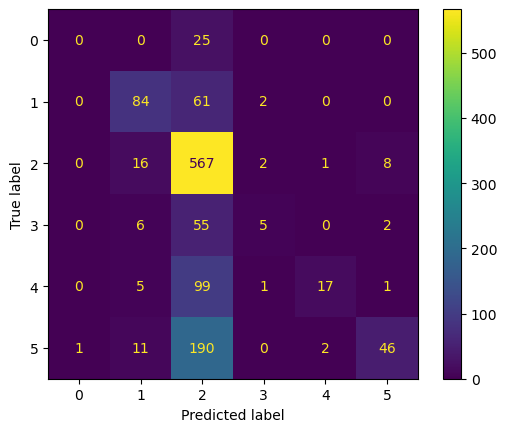

In [19]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_dectree, display_labels=unique_labels)
plt.show()

## Randomforest Classifier

In [20]:
# Build random forest
random_forest = RandomForestClassifier(n_estimators = 100, 
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6, 
                                       min_samples_leaf=8,
                                       random_state = 123)

In [21]:
random_forest.fit(X_train_clean, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=123)

In [22]:
random_forest.fit(X_train_clean, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=123)

In [23]:
# Model score
random_forest.score(X_train_clean, y_train)

0.4930452061599603

In [24]:
y_pred_rf = random_forest.predict(X_test_clean)

In [25]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00       147
           2       0.49      1.00      0.66       594
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00       123
           5       0.00      0.00      0.00       250

    accuracy                           0.49      1207
   macro avg       0.08      0.17      0.11      1207
weighted avg       0.24      0.49      0.32      1207



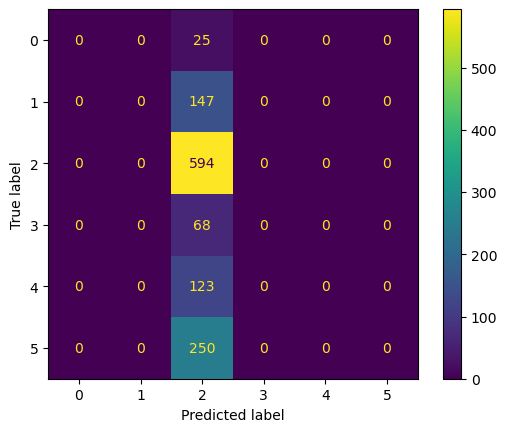

In [26]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=unique_labels)
plt.show()

## Tuning Parameter Randomforest

In [27]:
# Buat parameter untuk eksperimen
random_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'n_estimators': [50, 100, 200],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                "criterion": ["gini", "entropy"]
                }

In [28]:
# Buat plan eksperimentasi
random_forestcls = GridSearchCV(estimator = RandomForestClassifier(random_state=123),
                                param_grid = random_param,
                                cv = 5,
                                scoring = "accuracy") 

In [ ]:
# Lakukan fitting eksperimentasi
random_forestcls.fit(X_train_clean, y_train)

In [ ]:
random_forestcls.best_params_

In [ ]:
# Buat model
random_forestcls_cv = RandomForestClassifier(max_depth = random_forestcls.best_params_["max_depth"],
                                             criterion = random_forestcls.best_params_["criterion"],
                                             n_estimators = random_forestcls.best_params_["n_estimators"],
                                             min_samples_leaf = random_forestcls.best_params_["min_samples_leaf"],
                                             min_samples_split = random_forestcls.best_params_["min_samples_split"],
                                             random_state = 123)

In [ ]:
# Fit model
random_forestcls_cv.fit(X_train_clean, y_train)

In [ ]:
predict_randomcls_cv = random_forestcls_cv.predict(X_test_clean)

In [ ]:
print(classification_report(y_test, predict_randomcls_cv))

In [ ]:
print(f"Training Data Score: {random_forestcls_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {random_forestcls_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {random_forestcls_cv.score(X_test_clean, y_test)}")

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, predict_randomcls_cv, display_labels=unique_labels)
plt.show()

## Ridge Classifier

In [36]:
ridge = RidgeClassifier(random_state = 123) #create a ridge classifier object

In [37]:
ridge.fit(X_train_clean, y_train) #train the model

RidgeClassifier(random_state=123)

In [38]:
ridge.score(X_train_clean, y_train)

0.9911823149528067

In [39]:
pred_ridge = ridge.predict(X_test_clean)

In [40]:
print(classification_report(y_test, pred_ridge))

              precision    recall  f1-score   support

           0       0.79      0.44      0.56        25
           1       0.94      0.88      0.91       147
           2       0.83      0.95      0.89       594
           3       0.82      0.54      0.65        68
           4       0.88      0.80      0.84       123
           5       0.84      0.72      0.77       250

    accuracy                           0.85      1207
   macro avg       0.85      0.72      0.77      1207
weighted avg       0.85      0.85      0.84      1207



In [41]:
print(f"Training Data Score: {ridge.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {ridge.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge.score(X_test_clean, y_test)}")

Training Data Score: 0.9911823149528067
Validating Data Score: 0.8486352357320099
Testing Data Score: 0.8475559237779619


## Tuning Parameter Ridge Classifier

In [42]:
clf_ridge = RidgeClassifier(random_state = 123)

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

ridge_cv = GridSearchCV(estimator=clf_ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [43]:
ridge_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=RidgeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='accuracy')

In [44]:
ridge_cv.best_params_

{'alpha': 0.4}

In [45]:
# Buat model
ridge_cv = RidgeClassifier(alpha = ridge_cv.best_params_["alpha"],
                           random_state = 123)

In [46]:
# Fit model
ridge_cv.fit(X_train_clean, y_train)

RidgeClassifier(alpha=0.4, random_state=123)

In [47]:
# Cek Test data
ridge_cv.score(X_train_clean, y_train)

0.9993790362642822

In [48]:
predict_ridgecv = ridge_cv.predict(X_test_clean)

In [49]:
print(classification_report(y_test, predict_ridgecv))

              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.94      0.90      0.92       147
           2       0.84      0.94      0.89       594
           3       0.76      0.57      0.66        68
           4       0.85      0.81      0.83       123
           5       0.83      0.73      0.78       250

    accuracy                           0.85      1207
   macro avg       0.83      0.75      0.78      1207
weighted avg       0.85      0.85      0.84      1207



In [50]:
print(f"Training Data Score: {ridge_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {ridge_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.9993790362642822
Validating Data Score: 0.8387096774193549
Testing Data Score: 0.8475559237779619


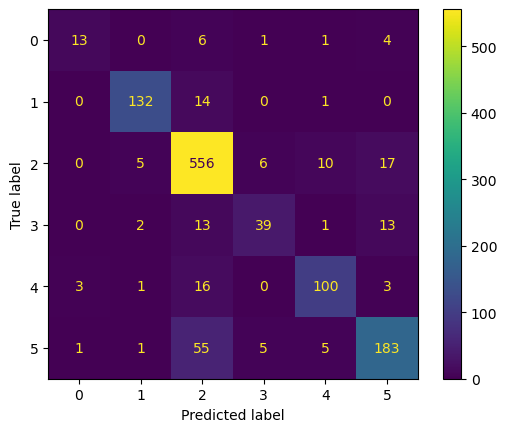

In [51]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, predict_ridgecv, display_labels=unique_labels)
plt.show()

## KNeighborsClassifier

In [3]:
# Build KNeighborsRegressor
knn_awal = KNeighborsClassifier()

In [4]:
# fit KNeighborsRegressor
knn_awal.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [5]:
knn_awal.score(X_train_clean, y_train)

0.8731992051664182

In [6]:
knn_pred = knn_awal.predict(X_test_clean)

In [7]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.62      0.52      0.57        25
           1       0.86      0.89      0.88       147
           2       0.83      0.92      0.87       594
           3       0.74      0.37      0.49        68
           4       0.62      0.78      0.69       123
           5       0.86      0.64      0.73       250

    accuracy                           0.80      1207
   macro avg       0.75      0.69      0.70      1207
weighted avg       0.81      0.80      0.80      1207



In [8]:
print(f"Training Data Score: {knn_awal.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {knn_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {knn_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.8731992051664182
Validating Data Score: 0.7866004962779156
Testing Data Score: 0.8036454018227009


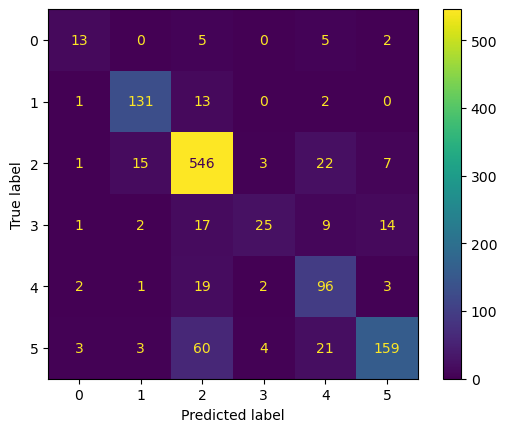

In [9]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, display_labels=unique_labels)
plt.show()

## Tuning Parameter KNeighborsClassifier

In [10]:
kn_param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [11]:
knn = KNeighborsClassifier()

In [12]:
kn_grid = GridSearchCV(knn, kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [13]:
kn_grid.fit(X_train_clean, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.162 total time=   1.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.161 total time=   1.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.171 total time=   0.9s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.773 total time=   0.8s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.153 total time=   1.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.162 total time=   0.7s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.161 total time=   0.7s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.171 total time=   0.7s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.773 total time=   1.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.153 total time=   0.9s
[

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [14]:
print(kn_grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [15]:
# Refit the KNeighborsRegressor
kn_grid = KNeighborsClassifier(n_neighbors = kn_grid.best_params_["n_neighbors"],
                               weights = kn_grid.best_params_["weights"],
                               algorithm = kn_grid.best_params_["algorithm"]
                              )

In [16]:
kn_grid.fit(X_train_clean, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [17]:
knn_cvpred = kn_grid.predict(X_test_clean)

In [18]:
print(classification_report(y_test, knn_cvpred))

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        25
           1       0.92      0.83      0.87       147
           2       0.82      0.94      0.88       594
           3       0.79      0.32      0.46        68
           4       0.72      0.81      0.76       123
           5       0.80      0.69      0.74       250

    accuracy                           0.81      1207
   macro avg       0.78      0.64      0.68      1207
weighted avg       0.81      0.81      0.80      1207



In [19]:
print(f"Training Data Score: {kn_grid.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {kn_grid.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {kn_grid.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8076923076923077
Testing Data Score: 0.8135874067937034


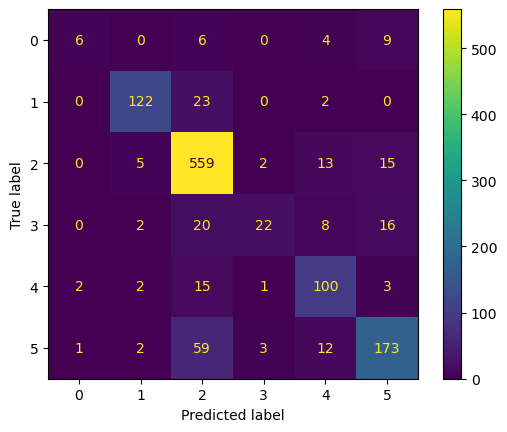

In [20]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn_cvpred, display_labels=unique_labels)
plt.show()

### Bagging Classifier

In [21]:
dec_tree = DecisionTreeClassifier(random_state=123)

In [22]:
bagging_cls = BaggingClassifier(base_estimator=dec_tree, n_estimators=10, random_state=123)

In [23]:
# fit KNeighborsRegressor
bagging_cls.fit(X_train_clean, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123),
                  random_state=123)

In [24]:
bagging_cls.score(X_train_clean, y_train)

0.977645305514158

In [25]:
bagging_predict = bagging_cls.predict(X_test_clean)

In [26]:
print(classification_report(y_test, bagging_predict))

              precision    recall  f1-score   support

           0       0.43      0.24      0.31        25
           1       0.69      0.83      0.75       147
           2       0.81      0.82      0.81       594
           3       0.48      0.31      0.38        68
           4       0.49      0.66      0.56       123
           5       0.73      0.60      0.66       250

    accuracy                           0.72      1207
   macro avg       0.60      0.58      0.58      1207
weighted avg       0.72      0.72      0.71      1207



In [27]:
print(f"Training Data Score: {bagging_cls.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {bagging_cls.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cls.score(X_test_clean, y_test)}")

Training Data Score: 0.977645305514158
Validating Data Score: 0.7307692307692307
Testing Data Score: 0.7166528583264291


## Tuning Parameter Bagging Classifier

In [21]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
bagging_param_grid = {'n_estimators' : [10, 100, 1000]}

In [22]:
bagging_grid_cv = GridSearchCV(estimator=BaggingClassifier(random_state=123), 
                               param_grid=bagging_param_grid, 
                               n_jobs=-1, 
                               cv=cv, 
                               scoring='accuracy',
                               error_score=0)

In [ ]:
bagging_grid_cv.fit(X_train_clean, y_train)

In [ ]:
bagging_grid_cv.best_params_

In [ ]:
bagging_cv  = BaggingClassifier(n_estimators = bagging_grid_cv.best_params_["n_estimators"])

In [ ]:
bagging_cv.fit(X_train_clean, y_train)

In [ ]:
baggingcv_predict = bagging_cv.predict(X_test_clean)

In [ ]:
print(classification_report(y_test, baggingcv_predict))

In [ ]:
print(f"Training Data Score: {bagging_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {bagging_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cv.score(X_test_clean, y_test)}")

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, baggingcv_predict, display_labels=unique_labels)
plt.show()

## Gradient Boosting

In [52]:
# Build GradientBoosting
grad_boost = GradientBoostingClassifier(random_state = 123)

In [53]:
# Fit GradientBoosting
grad_boost.fit(X_train_clean, y_train)

GradientBoostingClassifier(random_state=123)

In [54]:
grad_boost.score(X_train_clean, y_train)

0.7822901142573274

In [55]:
gradboost_predict = grad_boost.predict(X_test_clean)

In [56]:
print(classification_report(y_test, gradboost_predict))

              precision    recall  f1-score   support

           0       0.58      0.28      0.38        25
           1       0.83      0.71      0.77       147
           2       0.68      0.96      0.79       594
           3       0.91      0.31      0.46        68
           4       0.91      0.58      0.71       123
           5       0.87      0.44      0.58       250

    accuracy                           0.73      1207
   macro avg       0.80      0.55      0.61      1207
weighted avg       0.77      0.73      0.71      1207



In [57]:
print(f"Training Data Score: {grad_boost.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {grad_boost.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {grad_boost.score(X_test_clean, y_test)}")

Training Data Score: 0.7822901142573274
Validating Data Score: 0.728287841191067
Testing Data Score: 0.7315658657829329


### Tuning Parameter Gradient Boosting

In [28]:
grad_param_grid = {
    'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9]
}

In [29]:
grad_grid_cv = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=grad_param_grid,
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)

In [ ]:
grad_grid_cv.fit(X_train_clean, y_train)

In [ ]:
grad_grid_cv.best_params_

In [ ]:
gradboost_cv  = GradientBoostingClassifier(n_estimators = grad_grid_cv.best_params_["n_estimators"],
                                           learning_rate = grad_grid_cv.best_params_["learning_rate"],
                                           subsample = grad_grid_cv.best_params_["subsample"],
                                           max_depth = grad_grid_cv.best_params_["max_depth"],
                                           random_state = 123)

In [ ]:
gradboost_cv.fit(X_train_clean, y_train)

In [ ]:
gradboost_pred_cv = gradboost_cv.predict(X_test_clean)

In [ ]:
print(classification_report(y_test, gradboost_pred_cv))

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, gradboost_pred_cv, display_labels=unique_labels)
plt.show()

## Adaboost Classifier

### Adaboost SVC

In [ ]:
svc = SVC(probability=True, kernel='linear', random_state = 123)

# Create adaboost classifer object
adaboost_svc = AdaBoostClassifier(n_estimators=50, 
                                  base_estimator=svc,
                                  learning_rate=1)

In [ ]:
# Train Adaboost Classifer
adaboost_svc.fit(X_train_clean, y_train)

In [ ]:
adaboost_svc.score(X_train_clean, y_train)

In [ ]:
ada_predict = adaboost_svc.predict(X_test_clean)

In [ ]:
print(classification_report(y_test, ada_predict))

In [ ]:
print(f"Training Data Score: {adaboost_svc.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {adaboost_svc.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_svc.score(X_test_clean, y_test)}")

### Adaboost Original

In [28]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state = 123)

In [29]:
# Train Adaboost Classifer
abc_ori = abc.fit(X_train_clean, y_train)

In [30]:
abc_ori.score(X_train_clean, y_train)

0.5848236462990561

In [31]:
adaboost_pred_ori = abc_ori.predict(X_test_clean)

In [32]:
print(classification_report(y_test, adaboost_pred_ori))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32        25
           1       0.64      0.65      0.65       147
           2       0.58      0.93      0.71       594
           3       0.53      0.12      0.19        68
           4       0.89      0.13      0.23       123
           5       0.63      0.15      0.24       250

    accuracy                           0.59      1207
   macro avg       0.63      0.37      0.39      1207
weighted avg       0.62      0.59      0.52      1207



In [33]:
print(f"Training Data Score: {abc_ori.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {abc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {abc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.5848236462990561
Validating Data Score: 0.6066997518610422
Testing Data Score: 0.5907207953603977


## Tuning Parameter Adaboost

In [ ]:
adaboost = AdaBoostClassifier(random_state = 123)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
grid_search_adaboost = GridSearchCV(adaboost, param_grid, scoring='accuracy', cv=5)

In [ ]:
grid_search_adaboost.fit(X_train_clean, y_train)

In [ ]:
print(grid_search_adaboost.best_params_)

In [ ]:
adaboost_best = AdaBoostClassifier(n_estimators = grid_search_adaboost.best_params_["n_estimators"],
                                   learning_rate = grid_search_adaboost.best_params_["learning_rate"],
                                   algorithm = grid_search_adaboost.best_params_["algorithm"]
                                  )

In [ ]:
adaboost_best.fit(X_train_clean, y_train)

In [ ]:
adaboost_pred_cv = adaboost_best.predict(X_test_clean)

In [ ]:
print(classification_report(y_test, adaboost_pred_cv))

In [ ]:
print(f"Training Data Score: {adaboost_best.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {adaboost_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_best.score(X_test_clean, y_test)}")

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_pred_cv, display_labels=unique_labels)
plt.show()

## Extratrees Classifier

In [34]:
extra_trees_awal = ExtraTreesClassifier(random_state = 123)

In [35]:
extra_trees_awal.fit(X_train_clean, y_train)

ExtraTreesClassifier(random_state=123)

In [36]:
extra_trees_awal.score(X_train_clean, y_train)

1.0

In [37]:
y_extratress_pred = extra_trees_awal.predict(X_test_clean)

In [42]:
print(classification_report(y_test, y_extratress_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        25
           1       0.84      0.88      0.86       147
           2       0.83      0.90      0.86       594
           3       0.81      0.31      0.45        68
           4       0.54      0.72      0.62       123
           5       0.77      0.68      0.72       250

    accuracy                           0.78      1207
   macro avg       0.72      0.60      0.62      1207
weighted avg       0.78      0.78      0.77      1207



In [39]:
print(f"Training Data Score: {extra_trees_awal.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {extra_trees_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_awal.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8052109181141439
Testing Data Score: 0.7804473902236951


## Tuning Parameter Extratrees Classifier

In [ ]:
extra_trees = ExtraTreesClassifier(random_state = 123)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_et = GridSearchCV(extra_trees, param_grid, scoring='accuracy', cv=5)

In [ ]:
grid_search_et.fit(X_train_clean, y_train)

In [ ]:
print(grid_search_et.best_params_)

In [ ]:
extra_trees_best = ExtraTreesClassifier(n_estimators = grid_search_et.best_params_["n_estimators"], 
                                        max_depth = grid_search_et.best_params_["max_depth"], 
                                        min_samples_split= grid_search_et.best_params_["min_samples_split"], 
                                        min_samples_leaf=grid_search_et.best_params_["min_samples_leaf"])

In [ ]:
extra_trees_best.fit(X_train_clean, y_train)

In [ ]:
extratreescv_pred = extra_trees_best.predict(X_test_clean)

In [ ]:
print(classification_report(y_test, extratreescv_pred))

In [ ]:
print(f"Training Data Score: {extra_trees_best.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {extra_trees_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_best.score(X_test_clean, y_test)}")

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, extratreescv_pred, display_labels=unique_labels)
plt.show()

## XGboost Classifier

In [43]:
xgb_classifier = xgb.XGBClassifier(random_state = 123)

In [59]:
xgb_classifier.fit(X_train_clean, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [60]:
xgb_classifier.score(X_train_clean, y_train)

0.868976651763537

In [61]:
xgb_pred = xgb_classifier.predict(X_test_clean)

In [62]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.49        25
           1       0.89      0.74      0.81       147
           2       0.71      0.94      0.81       594
           3       0.74      0.29      0.42        68
           4       0.88      0.60      0.71       123
           5       0.79      0.53      0.63       250

    accuracy                           0.75      1207
   macro avg       0.77      0.58      0.65      1207
weighted avg       0.77      0.75      0.74      1207



In [63]:
print(f"Training Data Score: {xgb_classifier.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {xgb_classifier.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {xgb_classifier.score(X_test_clean, y_test)}")

Training Data Score: 0.868976651763537
Validating Data Score: 0.7692307692307693
Testing Data Score: 0.7506213753106876


## Tuning Parameter XGboost

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}


In [45]:
grid_search_xg = GridSearchCV(xgb_classifier, param_grid, scoring='accuracy', cv=5)

In [46]:
grid_search_xg.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, ...),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [47]:
print(grid_search_xg.best_params_)

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [48]:
xgb_best = xgb.XGBClassifier(n_estimators = grid_search_xg.best_params_["n_estimators"], 
                             max_depth = grid_search_xg.best_params_["max_depth"], 
                             learning_rate = grid_search_xg.best_params_["learning_rate"], 
                             subsample = grid_search_xg.best_params_["subsample"])

In [49]:
xgb_best.fit(X_train_clean, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [50]:
xgboost_cv_pred = xgb_best.predict(X_test_clean)

In [51]:
print(classification_report(y_test, xgboost_cv_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.89      0.81      0.85       147
           2       0.77      0.93      0.84       594
           3       0.65      0.35      0.46        68
           4       0.86      0.69      0.77       123
           5       0.79      0.64      0.71       250

    accuracy                           0.79      1207
   macro avg       0.77      0.64      0.69      1207
weighted avg       0.79      0.79      0.78      1207



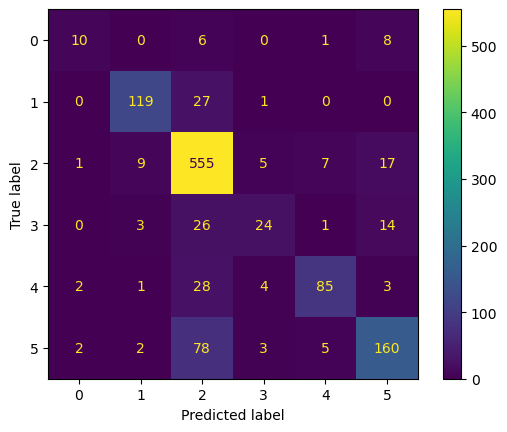

In [52]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, xgboost_cv_pred, display_labels=unique_labels)
plt.show()

## Deep Learning

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_clean, y_train, epochs=500, batch_size=32, validation_data=(X_valid_clean, y_valid))

In [ ]:
deep_pred = np.argmax(model.predict(X_valid_clean), axis=-1)
accuracy = accuracy_score(y_valid, deep_pred)
print("Accuracy:", accuracy)

In [ ]:
deep_pred = np.argmax(model.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, deep_pred))

## Tuning Parameter Deep Learning

In [ ]:
def create_model(units=64, layers=2, dropout=0.2):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(13,)))
    model.add(Dropout(dropout))
    for i in range(layers-1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model)

In [ ]:
param_grid = {
    'units': [32, 64, 128],
    'layers': [2, 3, 4],
    'dropout': [0.2, 0.3, 0.4]
}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [ ]:
grid_result = grid.fit(X_train_clean, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
deep_pred = np.argmax(grid_result.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, deep_pred))

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, deep_pred, display_labels=unique_labels)
plt.show()

## LightGBM

In [24]:
y_train_lgbm = y_train_lgbm.astype(np.float32)  # Konversi ke np.float32 jika belum numerik

In [64]:
# define the LightGBM classifier
lgb_awal = LGBMClassifier(random_state = 123)

In [65]:
lgb_awal.fit(X_train_clean, y_train)

LGBMClassifier(random_state=123)

In [66]:
# train the classifier
lgb_awal.score(X_train_clean, y_train)

0.8866120218579235

In [67]:
# make predictions on the testing set
lgb_pred = lgb_awal.predict(X_test_clean)

In [68]:
print(f"Training Data Score: {lgb_awal.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {lgb_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lgb_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.8866120218579235
Validating Data Score: 0.749379652605459
Testing Data Score: 0.7555923777961889


In [69]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29        25
           1       0.79      0.86      0.83       147
           2       0.78      0.88      0.83       594
           3       0.54      0.37      0.44        68
           4       0.68      0.63      0.65       123
           5       0.74      0.62      0.67       250

    accuracy                           0.76      1207
   macro avg       0.67      0.59      0.62      1207
weighted avg       0.75      0.76      0.75      1207



## Tuning Parameter LightGBM

In [ ]:
# define the LightGBM classifier
lgb = LGBMClassifier()

In [ ]:
# define the hyperparameters to tune
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
# create the grid search object
grid_search_lgb = GridSearchCV(lgb, param_grid=param_grid, cv=5)

In [ ]:
# train the grid search object
grid_search_lgb.fit(X_train_clean, y_train)

In [ ]:
best_params = grid_search_lgb.best_params_

In [ ]:
lgbm_best = LGBMClassifier(**best_params)

In [ ]:
lgbm_best.fit(X_train_clean, y_train)

In [ ]:
lgb_best_pred = lgbm_best.predict(X_test_clean)

In [ ]:
print(classification_report(y_test, lgb_best_pred))

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, lgb_best_pred, display_labels=unique_labels)
plt.show()

In [ ]:
# evaluate the classifier using accuracy score and ROC AUC score
acc = accuracy_score(y_test, lgb_best_pred)
roc_auc = roc_auc_score(y_test, lgb_best_pred)
print('Accuracy:', acc)
print('ROC AUC score:', roc_auc)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {'Logistic Regression': logreg_awal, 
          'Logistic Regression CV': lr_grid_cv,
          'Decision Tree': decTree, 
          'Decision Tree CV': best_decTree,
          'Support Vector Classifier':svc_ori,
          'Support Vector Classifier CV':svc_grid_cv,
          'Random Forest':random_forest,
          'Random Forest CV':random_forestcls_cv,
          'Ridge':ridge,
          'Ridge CV':ridge_cv,
          'KNN':knn_awal,
          'KNN CV':kn_grid,
          'Bagging':bagging_cls,
          'Bagging CV':bagging_cv,
          'gradient Boosting':grad_boost,
          'gradient Boosting CV':gradboost_cv,
          'Adaboost':abc_ori,
          'Adaboost SVC':adaboost_svc,
          'Adaboost CV':adaboost_best,
          'Extratrees':extra_trees_awal,
          'Extratrees CV':extra_trees_best,
          'XGboost':xgb_classifier,
          'XGboost CV':xgb_best,
          'LightGBM':lgb_awal,
          'LightGBM CV':lgbm_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
print(df_results)


In [ ]:
df_results

# Save Model

## Logistic Regression

In [227]:
logreg = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/logreg.pkl'
with open(logreg, 'wb') as file:
    pickle.dump(logreg_awal, file)
    
logreg_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/logreg_cv.pkl'
with open(logreg_cv, 'wb') as file:
    pickle.dump(lr_grid_cv, file)

## Support Vector Classifier

In [228]:
svc = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/svc.pkl'
with open(svc, 'wb') as file:
    pickle.dump(svc_ori, file)
    
svc_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/svc_cv.pkl'
with open(svc_cv, 'wb') as file:
    pickle.dump(svc_grid_cv, file)

## Decisiontree

In [229]:
dectree = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/dectree.pkl'
with open(dectree, 'wb') as file:
    pickle.dump(decTree, file)
    
dectree_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/dectree_cv.pkl'
with open(dectree_cv, 'wb') as file:
    pickle.dump(best_decTree, file)

## Randomforest

In [230]:
randomforest = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/randomforest.pkl'
with open(randomforest, 'wb') as file:
    pickle.dump(random_forest, file)
    
randomforest_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/randomforest_cv.pkl'
with open(randomforest_cv, 'wb') as file:
    pickle.dump(random_forestcls_cv, file)

## Ridge Classifier

In [231]:
ridge = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/ridge.pkl'
with open(ridge, 'wb') as file:
    pickle.dump(ridge, file)
    
ridge_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/ridge_cv.pkl'
with open(ridge_cv, 'wb') as file:
    pickle.dump(ridge_cv, file)

## KNN 

In [232]:
knn = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/knn.pkl'
with open(knn, 'wb') as file:
    pickle.dump(knn_awal, file)
    
knn_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/knn_cv.pkl'
with open(knn_cv, 'wb') as file:
    pickle.dump(kn_grid, file)

## Bagging Classifier

In [233]:
bagging = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/bagging.pkl'
with open(bagging, 'wb') as file:
    pickle.dump(bagging_cls, file)
    
bagging_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/bagging_cv.pkl'
with open(bagging_cv, 'wb') as file:
    pickle.dump(bagging_cv, file)

## Gradient Boosting

In [234]:
grad_boost = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/grad_boost.pkl'
with open(grad_boost, 'wb') as file:
    pickle.dump(grad_boost, file)
    
grad_boost_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/grad_boost_cv.pkl'
with open(grad_boost_cv, 'wb') as file:
    pickle.dump(gradboost_cv, file)

## Adaboost

In [235]:
adaboost_svc = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/adaboost_svc.pkl'
with open(adaboost_svc, 'wb') as file:
    pickle.dump(adaboost_svc, file)
    
adaboost_ori = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/adaboost_ori.pkl'
with open(adaboost_ori, 'wb') as file:
    pickle.dump(abc_ori, file)
    
adaboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/adaboost_cv.pkl'
with open(adaboost_cv, 'wb') as file:
    pickle.dump(adaboost_best, file)

## Extratrees

In [236]:
extra_trees = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/extra_trees.pkl'
with open(extra_trees, 'wb') as file:
    pickle.dump(extra_trees_awal, file)
    
extra_tree_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/extra_tree_cv.pkl'
with open(extra_tree_cv, 'wb') as file:
    pickle.dump(extra_trees_best, file)

## XgBoost

In [237]:
xgboost = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/xgboost.pkl'
with open(xgboost, 'wb') as file:
    pickle.dump(xgb_classifier, file)
    
xgboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/xgboost_cv.pkl'
with open(xgboost_cv, 'wb') as file:
    pickle.dump(xgb_best, file)

## Deep Learning

In [238]:
deep_learning = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/deep_learning.pkl'
with open(deep_learning, 'wb') as file:
    pickle.dump(model, file)
    
    
deep_learning_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/deep_learning_cv.pkl'
with open(deep_learning_cv, 'wb') as file:
    pickle.dump(grid_result, file)

INFO:tensorflow:Assets written to: C:\Users\HALAL\AppData\Local\Temp\tmp0de6a86h\assets


## LightGBM

In [239]:
lgbm = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/lgbm.pkl'
with open(lgbm, 'wb') as file:
    pickle.dump(lgb_awal, file)
    
lgbm_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/lgbm_cv.pkl'
with open(lgbm_cv, 'wb') as file:
    pickle.dump(lgbm_best, file)

## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"''"